# Creditworthiness of Caribbean Netherlands SMEs: measuring the financial ability and responsibility of SMEs in the Caribbean Netherlands to borrow and repay micro loans (Part2) #

### Introduction ###

**Research Context**

This is the followup to a project proposal I submitted as an assignment for the Data Programming in Python module at the University of London. My stated goal within the initial proposal was to develop a credit risk model that can be used by banks and financial institutions in the Caribbean Netherlands to "measure and score the financial ability and responsibility of SMEs" in repaying micro loans. The bank transactions of SME's would be the primary data used to train and evaluate the accuracy of such a credit risk model. Bank transactions are ideal because they offer a real time and ongoing insight into an individual's or business financial activities; particulary from a cashflow perspective. To that affect the bank transactions of TACT, an SME based in the Caribbean, was obtained, cleaned, explored and prepared for this next step.

<br>Following the initial project proposal, I carried out further research into the field of credit risk modelling for businesses. Traditionally banks and lending institutions use credit reports from external credit bureaus (e.g. TransUnion, Equifax, and Experian) in addition to financial statements when assessing the credit worthiness of [Micro, Small and Medium sized] businesses **(Astri, 2020)**. Essentially banks use this information to identify the probability of default (i.e. PD); the likelihood over a specified period, usually one year, that a borrower will not be able to make scheduled repayments **(Kenton, 2021)**. However, according to a report by the Hong Kong Applied Science and Technology Research Institute (i.e. ASTRI), "financial institutions seeking to assess the creditworthiness of MSMEs face a serious constraint and source of inefficiency in the lack of transparent management information available. Many banks prefer to lend to large enterprises rather than MSMEs because these enterprises are able to provide clear audited financial statements. It can be difficult for banks to evaluate MSMEs because they often do not have solid accounting systems in place" **(Astri, 2020)**. In the Caribbean Netherland this problem is exacerbated by the fact that most businesses are defined as micro or small enterprises. As such are not required by NL GAAP to produce audited financial statements. 

<br>Alternative data sources are increasingly being used to overcome challenges in assessing the credit worthiness of MSMEs. During my research I discovered that "the use of bank transactions is [a] relatively new" concept and is seen as an "alternative data" source within the space of credit risk modelling **(Luber, 2021)**. This is according to Equifax, one of the largest consumer credit reporting agencies worldwide. Alternative data also includes transactional data such as mobile phone usage, electricity consumption and social media data in addition to bank statements. The benefits of using alternative data for credit risk modeling include greater insights, data reliability, risk mitigation and continous monitoring. On the other hand, some key challenge in working with alternative data includes maintaining user privacy, the effort required in dataset feature engineering and in selecting the appropriate machine learning algorithms. On the last point, my research revealed that credit risk modelling has traditionally been seen as a classification problem; with a focus on identifying whether a user is likely to default or not. As a result, when it comes to applying machine learning algorithms to create traditional credit risk models, "logistic regression is considered the industry's practice" **(Verkade, 2018)**. However, my research also revealed that "there is no single answer to the question of which machine learning algorithm is best to use for alternative credit scoring" and that "model selection therefore needs to be an exploratory process involving the continuous evaluation of multiple machine learning models **(Astri, 2020)**." 


**Updated Project Objectives**

Based on the above research context, I aim to achieve the following objectives with this project;

a. Further engineer the dataset features for the purposes of applying appropriate machine learning algorithms
<br>b. Explore the dataset to determine whether it is fit for the task at hand
<br>c. Make use of external altnerative data if available and where appropriate
<br>d. Explore and compare the accuracy of atleast two classification ML algorithms for credit risk modeling 
<br>e. Evaluate project lessons learnt and discuss future work required



 

**Python Libraries**

Once again, Python will be used along with the following libraries to complete tasks including external data acquisition, feature set engineering, data visualization, model training and evaluation. Online documentation for the various libraries were accessed throughout the completion of this project. 

In [238]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

**Version Control**

The code for this project can be found on my personal Github repository at;

### Feature Engineering ###

**Dataset Import**
<br>Below I import the summarized transactions (i.e. sumtrans) dataset created during the initial project. The sumtrans dataset contains the daily summarized bank transactions of my firm accounting firm TACT throughout 2020. 

In [210]:
sumtrans = pd.read_csv("data/sum_bank_trans.csv")

**Dataset Features Explained**
<br>A short description of the dataset features are provided below;<br>
<br>0. <u>postdate</u> = the transactions date by year-month-day
<br>1. <u>uniquetypes</u> = a description of the unique transcations type per date
<br>2. <u>numuniquetypes</u> = the number of unique transcations types per date
<br>3. <u>numdebits</u> = the number of debit transcations per date (i.e. number of payments made)
<br>4. <u>numcredits</u> = the number of credit transcations per date (i.e. number of payments received)
<br>5. <u>sumdebits</u> = a total or summary of all debit amounts per date (i.e. total of payments made)
<br>6. <u>sumcredits</u> = a total or summary of all credit amounts per date (i.e. total of payments received)
<br>7. <u>sumdiff</u> = the difference between total debits and credits per date
<br>8. <u>repayposs</u> = indicates whether cashflow was positive 1 or negative 0 per date
<br>9. <u>repayscore</u> = arbitrary cashflow scoring system with 0 meaning negative cashflow and 5 meaning highest positive cashflow per date

Below I provide an overview of the sumtrans dataset at present.

In [211]:
sumtrans.head()

,postdate,uniquetypes,numuniquetypes,numdebits,numcredits,sumdebits,sumcredits,sumdiff,repayposs,repayscore
0,2020-01-02,['DEBIT NOTE'],1,2.0,NaN,573.6,NaN,-573.6,0,0
1,2020-01-03,['DEBIT NOTE' 'C/A ATM/TB TRANSFER CR'],2,3.0,1.0,236.6,565.0,328.4,1,2
2,2020-01-06,['CUSTOMER DEPOSIT'],1,NaN,1.0,NaN,2290.0,2290.0,1,5
3,2020-01-07,['CREDIT NOTE' 'CUSTOMER DEPOSIT'],2,NaN,2.0,NaN,2540.0,2540.0,1,5
4,2020-01-09,['C/A ATM/TB BILL PAYMENT DT'],1,1.0,NaN,1000.0,NaN,-1000.0,0,0


In [212]:
sumtrans.shape

(134, 10)

**Remove Unecessary Features**
<br>Below I remove the uniquetypes feature. My intention is to apply classification algorithms (i.e. logistic regression) to the dataset features. This will not work with features that contain categorical data such as uniquetypes. I did consider applying one-hot encoding to the uniquetypes feature to convert it to numerical data. However I decided against this because the combination of the numuniquetypes, numdebits and numcredits features provide essentially the same information.

In [213]:
# First make copy of existing dataset
sumtrans2 = sumtrans.copy()

# Drop uniquetypes feature
sumtrans2.drop(columns=['uniquetypes'], inplace=True)

**Rename Existing Features**
<br>I would like to rename certain features to better describe the data records they contain.

In [214]:
# Define new column names to replace existing one
newnames = {"postdate" : "transdate", "numuniquetypes": "numtranstypes", 
            "repayposs": "cashresult", "repayscore" : "cashscore" }

sumtrans2.rename(columns=newnames, inplace=True)

**Handling Features with NaN Values**
<br>The numdebits, numcredits, sumdebits and sumcredit should not contain NaN values. For example, if there were zero credit transactions on a day, this is better represented as a 0 value within the numcredits feature and a 0.0 value within the sumcredits feature instead of NaN. 

In [215]:
# Fill all NaN values with 0
sumtrans2.fillna(0,inplace=True)

**Changing Feature Data Types**
<br>I noticed that the numdebits and numcredits features contain float values. The values in these features would better be represented as integer values. For example, it's not possible to have 1.5 or 3.75 debits in a day. 

In [216]:
# Change numdebits and numcredits data type to integer
sumtrans2['numdebits'] = sumtrans2['numdebits'].astype(int)
sumtrans2['numcredits'] = sumtrans2['numcredits'].astype(int)

**Add New Date Features**
<br>My research indicated that feature engineering although challenging, is important to derive value from alternative data used for credit risk modelling. Below I seek to add new features to the dataset utilizing my background in accounting. In particular, I'd like to add features that can assist in revealing cashflow timing patterns. For this, the transdate feature will come in handy!

In [217]:
# Convert transdate feature from string to datetime
sumtrans2["transdate"] = pd.to_datetime(sumtrans2['transdate'])

# Create new date related features
transmonth = sumtrans2["transdate"].dt.month
transday = sumtrans2["transdate"].dt.day

# Insert new features into dataset
sumtrans2.insert(1,"transmonth",transmonth)
sumtrans2.insert(2,"transday",transday)


**Add New Cash Balance Feature**
<br>Below I added a new feature with shows a accumlating balance of the sumdiff feature

In [218]:
cashbalance = sumtrans2['sumdiff'].cumsum()

# Insert new features into dataset
sumtrans2.insert(9,"cashbalance",cashbalance)

**Preview of Sumtrans2 Dataset**
<br>We now have a more feature rich and appropriate dataset to work with.

In [219]:
sumtrans2.head()

,transdate,transmonth,transday,numtranstypes,numdebits,numcredits,sumdebits,sumcredits,sumdiff,cashbalance,cashresult,cashscore
0,2020-01-02,1,2,1,2,0,573.6,0.0,-573.6,-573.6,0,0
1,2020-01-03,1,3,2,3,1,236.6,565.0,328.4,-245.2,1,2
2,2020-01-06,1,6,1,0,1,0.0,2290.0,2290.0,2044.8,1,5
3,2020-01-07,1,7,2,0,2,0.0,2540.0,2540.0,4584.8,1,5
4,2020-01-09,1,9,1,1,0,1000.0,0.0,-1000.0,3584.8,0,0


### Acquire External Data ###

### Data Exploration ###

I'd like to explore the dataset to determine the most appropriate ML algorithms that can be applied to determine the credit risk that TacT represents. Looking at the features of the dataset, I believe that the cashbalance feature can serve as the outcome value using linear regression analysis. Additionally, the cashresult feature can serve as the outcome value using logistic regression analysis.

**Linear Regression**
<br>Logistic regression is a classification ML algorithm typically used in developing credit risk models. However, I'm curious to explore whether a regression ML algorithm could be applicable from a perspective of predicting cash balance; particularly in determining whether a positive linear relationship exists between an increase in transaction days and accumulated cash balance. This could indicate to a lender that TacT is generating more cash than it is spending and has the ability to afford loan repayments.

**Select Predictor and Outcome Variables**

In [234]:
# the dataset index values are selected as the independent x variables
x = sumtrans2.index.to_numpy()
# cashbalance figures are selected as the dependent y variables
y = sumtrans2['cashbalance'].to_numpy()

**Plot Scatter Graph**
<br>The results of the below scatter graph suggests a positive correlation exists between the independent x and dependent y variables. This means that only considering TacT's 2020 transactions days, the company's accumulated cash steadily increased from less than 0 to over $35k during a 12 month period. This could suggest good cashflow management and the ability to handle payment obligations. No correlation would essentially represent a stable cash balance or average performance. Finally, if the results had show a negative correlation this would suggest poor cashflow management. 

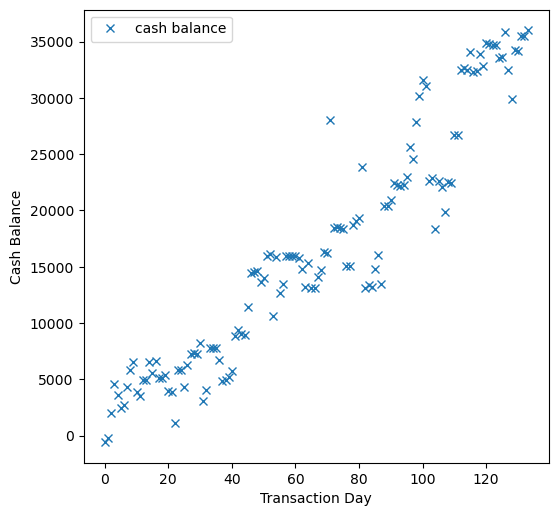

In [237]:
#Plot x and y variables
plt.figure(figsize=(6,6), dpi=100)
plt.plot(x, y, 'x', label='cash balance')
plt.xlabel('Transaction Day') 
plt.ylabel('Cash Balance') 
plt.legend()
plt.show()

**Model Linear Regression Relationship**
<br>Below, I see to model the linear relationship between the x and y values outlined above.

In [251]:
b, a, r_value, p_value, std_err = linregress(x, y)

In [255]:
print("The linear relationship between X and Y values can summed up in the following equation;")
print("Y", "=", str(a), "+", str(b), "*", "X")

The linear relationship between X and Y values can summed up in the following equation;
Y = -344.7835223880684 + 255.2459658848615 * X


**Plot Line of Best Fit**

**Usin

**Logistic Regression**

### Create Train and Test Datasets ###

### Train Models ###

### Make Predictions ###

### Evaluation ###

### Resources ###

Quick List of Resources
<br>See (Luber, 2021) https://www.equifax.com/newsroom/all-news/-/story/bank-transaction-data-can-help-the-underserved-6/
<br> See (ASTRI, 2020) https://www.astri.org/news-detail/astri-publishes-white-paper-on-alternative-credit-scoring-of-msmes/
<br>See (Kenton, 2021) https://www.investopedia.com/terms/d/defaultprobability.asp
<br>See (Vasile, 2020) https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc
<br>See (Verkade, 2018) https://repository.tudelft.nl/islandora/object/uuid%3A6ed89f2f-2c5f-4b85-859b-47a244da609b
<br>See (Baesens et al, 2005) https://www.researchgate.net/publication/251376222_Linear_and_Non-linear_Credit_Scoring_by_Combining_Logistic_Regression_and_Support_Vector_Machines 
<br>Bruce, Bruce and Gedeck (2020). Practical Statistics for Data Scientists 2nd edition. Boston: O'Reilly
<br>Summerfield, M (2010). Programming in Python 3: A Complete Introduction to the Python Language 2nd edition. Addison-Welsey
<br>McKinney, W. (2017). Python for Data Analysis 2nd edition. Boston: O'Reilly
 